In [1]:
# Libraries needed for the tutorial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("data_for_lr.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Data Preprocessing
## Removing Null values

In [4]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
df=df.dropna()
df.isnull().any()

x    False
y    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


## Splitting dataset

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df["x"],df["y"],test_size=0.2,random_state=1)

In [8]:
print("size of training data {}".format(x_train.shape))
print("size of training data {}".format(x_test.shape))
print("size of training data {}".format(y_train.shape))
print("size of training data {}".format(y_test.shape))

size of training data (559,)
size of training data (140,)
size of training data (559,)
size of training data (140,)


# Forward Propogation

In [9]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# Cost Function


In [10]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

# Gradient Decient

In [11]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

In [12]:
# Updating parameter
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# Train the Data
Sequence of Steps:

Forward Propagtaion<br>
Cost Function<br>
Backward Propagation<br>
Update Parameters

In [13]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(x_train, y_train, '+', label='Original')
        ax.plot(x_train, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(x_train, y_train, '+')
        plt.plot(x_train, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(x_train, y_train, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 4561.027419503221


<Figure size 640x480 with 0 Axes>

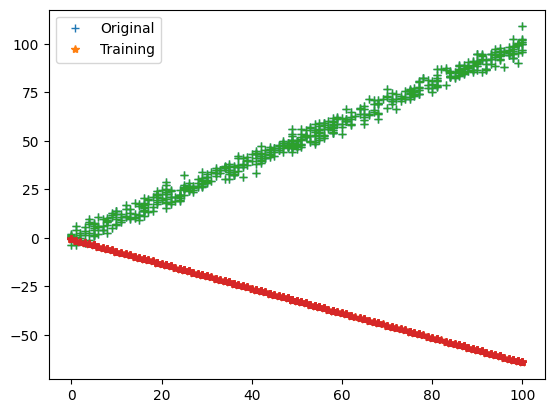

Iteration = 2, Loss = 2002.4633440777018


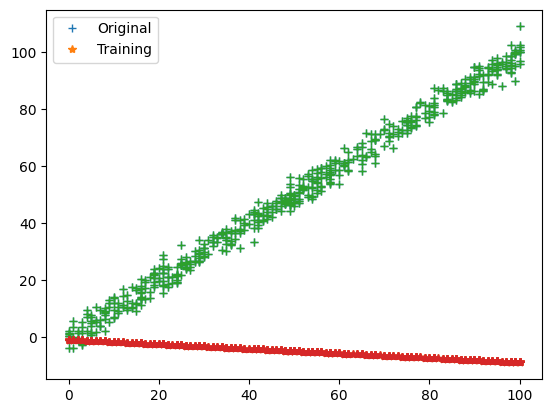

Iteration = 3, Loss = 880.3698685975477


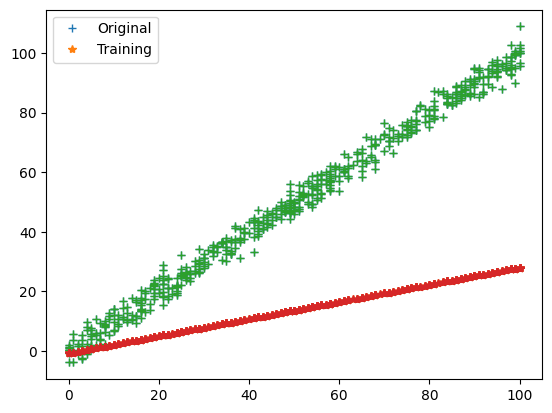

Iteration = 4, Loss = 388.2603362074397


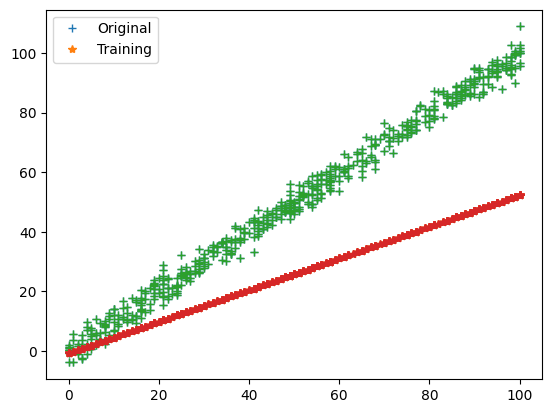

Iteration = 5, Loss = 172.4389287301966


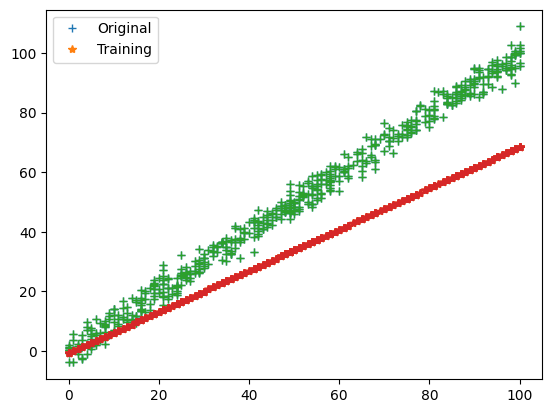

Iteration = 6, Loss = 77.78747932122403


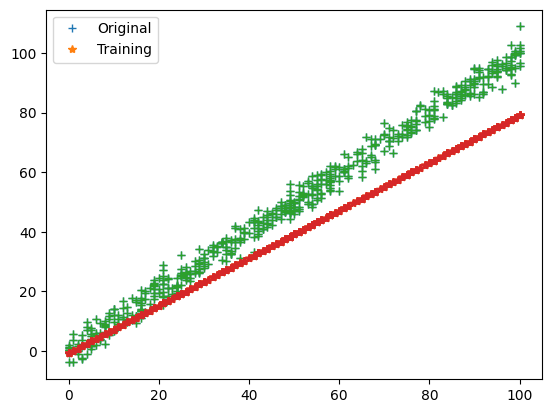

Iteration = 7, Loss = 36.276781954755826


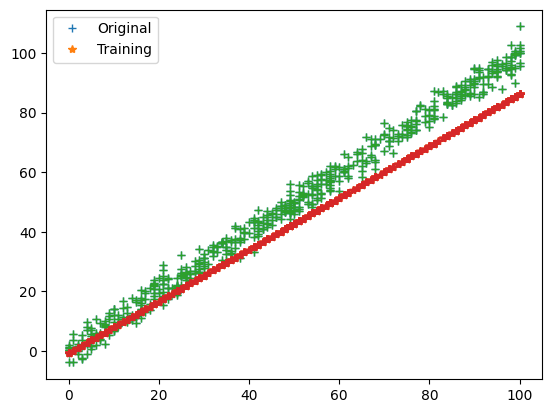

Iteration = 8, Loss = 18.07169245240068


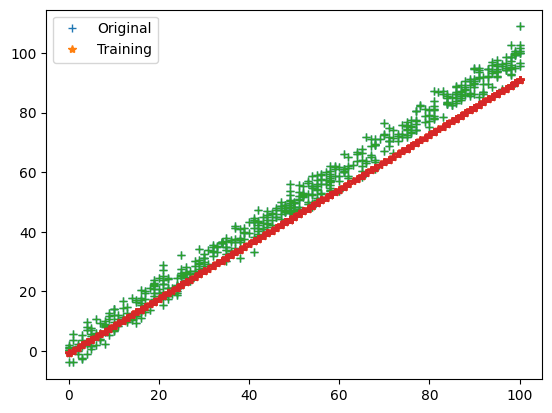

Iteration = 9, Loss = 10.087597893522139


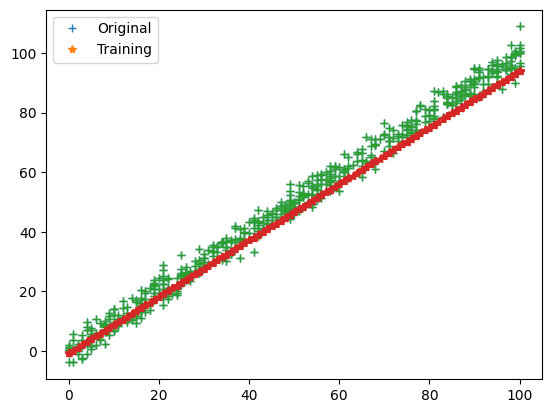

Iteration = 10, Loss = 6.586061277139197


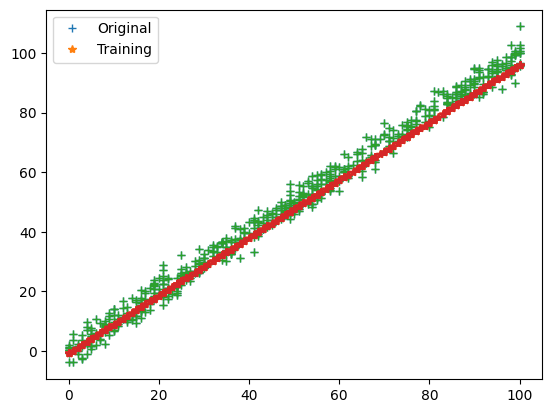

Iteration = 11, Loss = 5.050412112962051


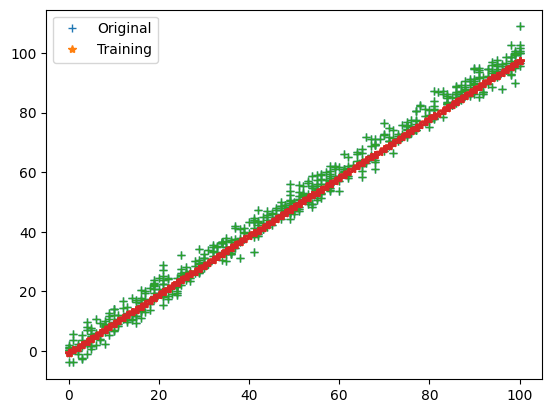

Iteration = 12, Loss = 4.3769299357120675


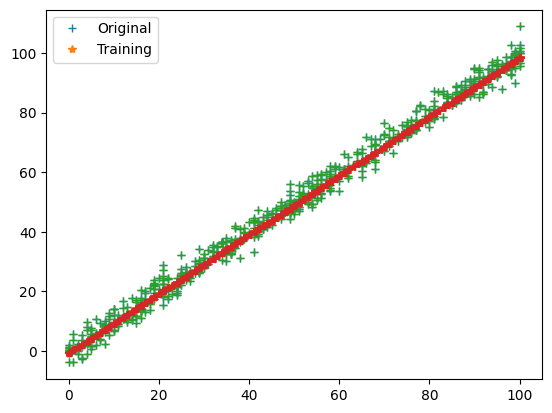

Iteration = 13, Loss = 4.081562951491254


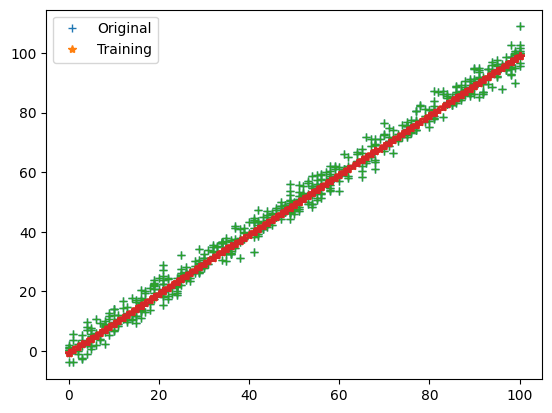

Iteration = 14, Loss = 3.9520235869992733


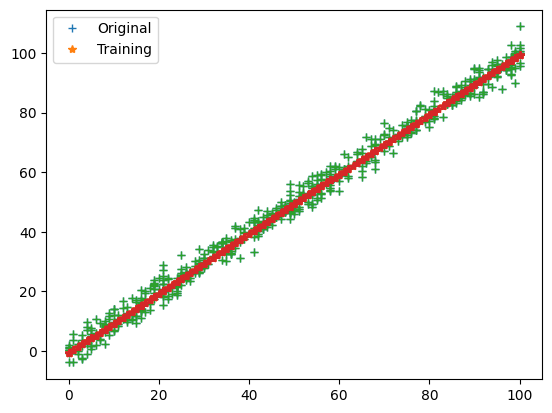

Iteration = 15, Loss = 3.8952102065313667


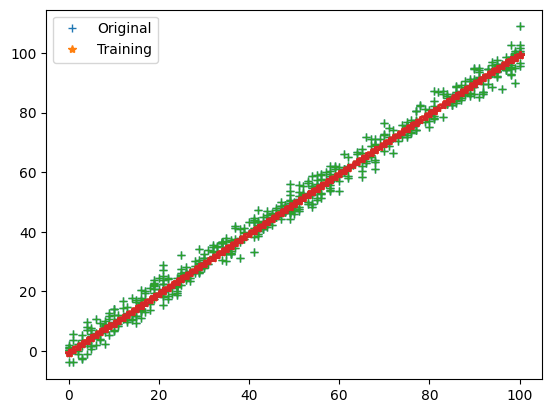

Iteration = 16, Loss = 3.8702918069527303


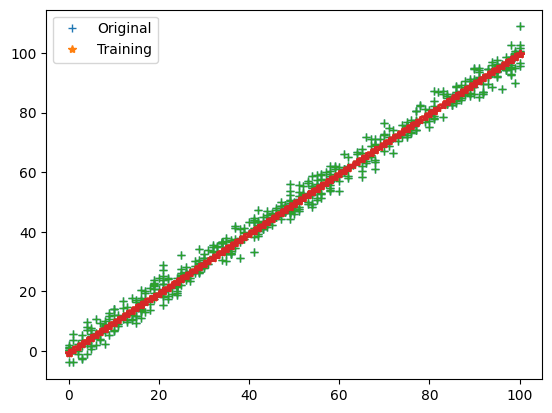

Iteration = 17, Loss = 3.859361390127679


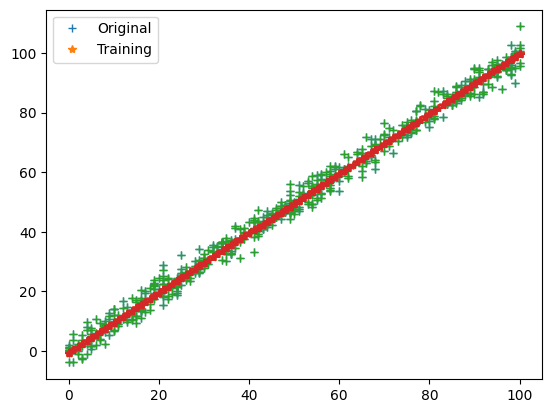

Iteration = 18, Loss = 3.8545655956777654


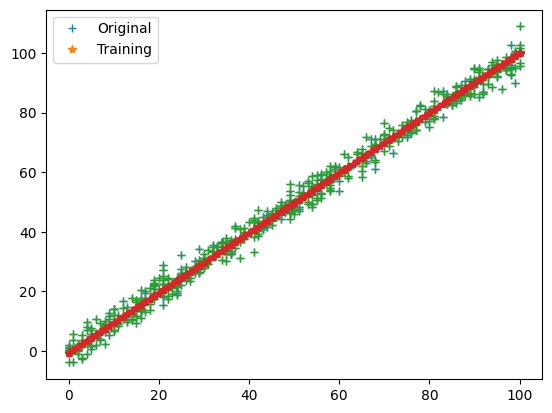

Iteration = 19, Loss = 3.8524602243705437


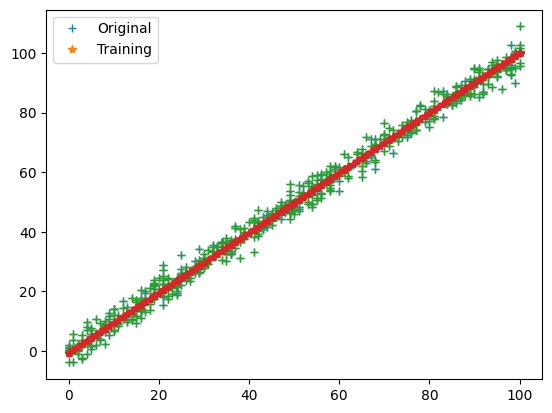

Iteration = 20, Loss = 3.8515347752508897


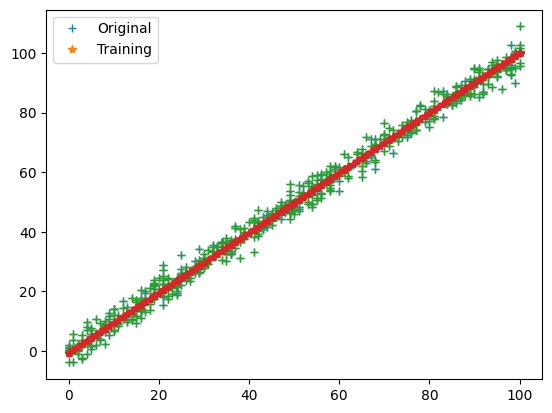

In [14]:
parameters, loss = train(x_train, y_train, 0.0001, 20)